# **ECG Signal Analysis for Detecting Abnormal Heart Activity**

In [76]:
import numpy as np
from scipy.fft import fft
from scipy.datasets import electrocardiogram
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

Electrocardiograms (ECGs) record the electrical activity of the heart over time, allowing doctors to diagnose heart abnormalities such as arrhythmias, premature ventricular contractions (PVCs), and other conditions. This project extends basic signal processing by introducing clustering to group similar patterns of heart activity based on extracted frequency features. We explore:

* FFT for frequency analysis of normal and abnormal heartbeats.
* Spectrograms for time-frequency analysis.
* K-Means clustering on the FFT feature space to identify distinct patterns in heart activity without prior labels.

In [77]:
ecg = electrocardiogram()
fs = 360

#time periods
normalTimePeriod = (9, 10.2)
pvcTimePeriod = (46.5, 50)
abnormalTimePeriod = (207, 215)

#time index for different periods
normalStartValue = int(9 * 360)
normalEndValue = int(10.2 * 360)
PrematureStartValue = int(46.5 * 360)
PrematureEndValue = int(50 * 360)
abnormalStartValue = int(207 * 360)
abnormalEndValue = int(215 * 360)

In [78]:
#extract segments
normal_ecg = ecg[normalStartValue:normalEndValue]
pvc_ecg = ecg[PrematureStartValue:PrematureEndValue]
abnormal_ecg = ecg[abnormalStartValue:abnormalEndValue]

## FFT Analysis

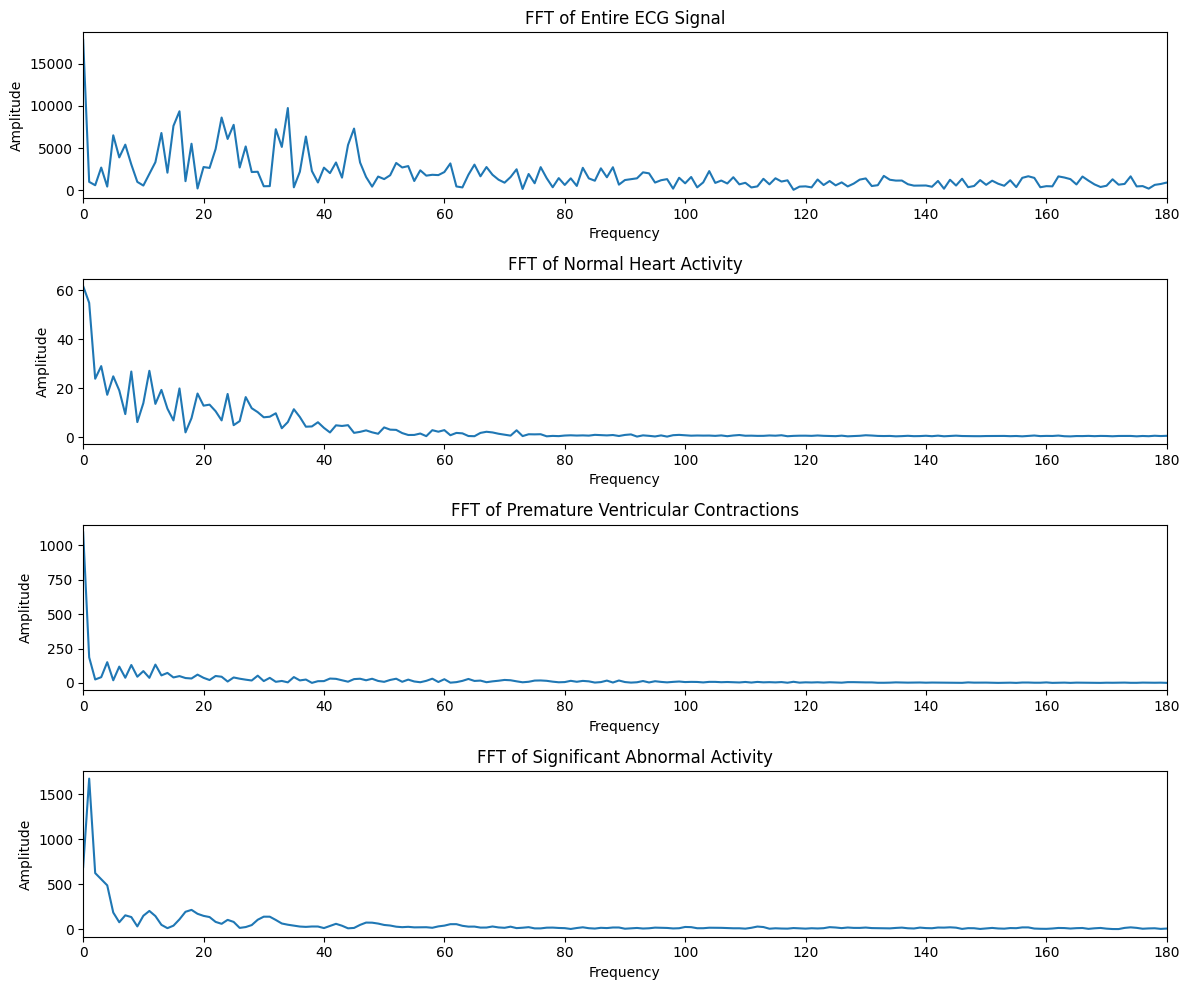

In [79]:
plt.figure(figsize=(12, 10))

#FFT for the entire ECG signal
fftecg = fft(ecg)
plt.subplot(4, 1, 1)
plt.plot(np.abs(fftecg))
plt.xlim(0, 180)
plt.title('FFT of Entire ECG Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for normal heart activity
fftNormal = fft(ecg[normalStartValue:normalEndValue])
plt.subplot(4, 1, 2)
plt.plot(np.abs(fftNormal))
plt.xlim(0, 180)
plt.title('FFT of Normal Heart Activity')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for premature ventricular contractions
fftPremature = fft(ecg[PrematureStartValue:PrematureEndValue])
plt.subplot(4, 1, 3)
plt.plot(np.abs(fftPremature))
plt.xlim(0, 180)
plt.title('FFT of Premature Ventricular Contractions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for significant abnormal activity
fftAbnormal = fft(ecg[abnormalStartValue:abnormalEndValue])
plt.subplot(4, 1, 4)
plt.plot(np.abs(fftAbnormal))
plt.xlim(0, 180)
plt.title('FFT of Significant Abnormal Activity')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Spectrogram analysis

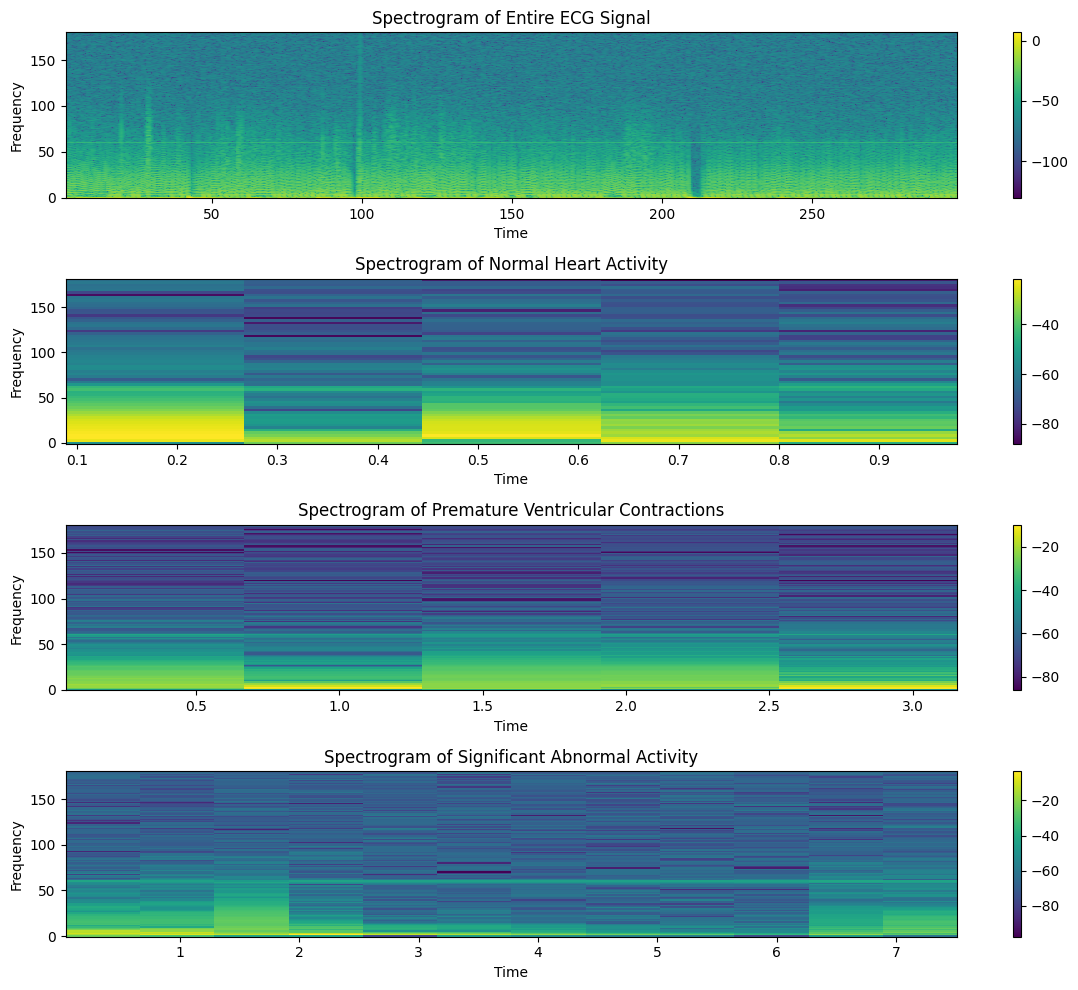

In [80]:
plt.figure(figsize=(12, 10))

#Spectrogram for the entire ECG signal
freqs, times, Sx = spectrogram(ecg, fs=360, window='hann', nperseg=1024, noverlap=924, detrend=False, scaling='spectrum')
plt.subplot(4, 1, 1)
plt.pcolormesh(times, freqs, 10 * np.log10(Sx))
plt.title('Spectrogram of Entire ECG Signal')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

#Spectrogram for normal heart activity
freqs, times, Sx = spectrogram(ecg[normalStartValue:normalEndValue], fs=360, window='hamming', nperseg=128, noverlap=64)
plt.subplot(4, 1, 2)
plt.pcolormesh(times, freqs, 10 * np.log10(Sx))
plt.title('Spectrogram of Normal Heart Activity')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

#Spectrogram for premature ventricular contractions
freqsPVC, timesPVC, SxP = spectrogram(ecg[PrematureStartValue:PrematureEndValue], fs=360)
plt.subplot(4, 1, 3)
plt.pcolormesh(timesPVC, freqsPVC, 10 * np.log10(SxP))
plt.title('Spectrogram of Premature Ventricular Contractions')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

#Spectrogram for significant abnormal activity
freqsAbnormal, timesAbnormal, SxA = spectrogram(ecg[abnormalStartValue:abnormalEndValue], fs=360)
plt.subplot(4, 1, 4)
plt.pcolormesh(timesAbnormal, freqsAbnormal, 10 * np.log10(SxA))
plt.title('Spectrogram of Significant Abnormal Activity')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

plt.tight_layout()
plt.show()

## K-Means Clustering

In [81]:
fft_normal = np.abs(fft(ecg[normalStartValue:normalEndValue]))
fft_pvc = np.abs(fft(ecg[PrematureStartValue:PrematureEndValue]))
fft_abnormal = np.abs(fft(ecg[abnormalStartValue:abnormalEndValue]))

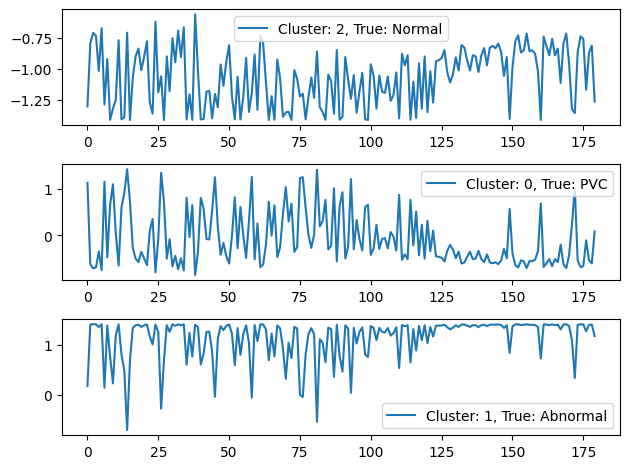

In [82]:
X = np.vstack([fft_normal[:180], fft_pvc[:180], fft_abnormal[:180]])
y_labels = ['Normal', 'PVC', 'Abnormal']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(X_scaled[i], label=f'Cluster: {labels[i]}, True: {y_labels[i]}')
    plt.legend()
plt.tight_layout()
plt.show()